# Import packages

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

# Import raw data file and check the top 5 rows

In [2]:
df=pd.read_csv('movies.csv')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Check if there is null value

In [3]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

# Check data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


### Noted that "budget" and "gross" columns should be integer type, "released" column shoud be datetime type.

# Change data type of budget, gross and released columns

In [5]:
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['released']=pd.to_datetime(df['released'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   int64         
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   int64         
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
 14  year      6820 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 799.3+ KB


# Check if the year column is correct

In [6]:
df['year_released']=df['released'].apply(lambda d:d.year)
(df['year_released']!=df['year']).sum() #To see how many incorrect years.

1487

### There are 1487 different values. It means "year" column is not precise. So drop it here.

In [7]:
df=df.drop('year',axis=1)

# Check if there are duplicate rows

In [8]:
df.duplicated(keep=False).sum()

0

# Hypothesis: More budget more gross earnings

## Check the relationship between budget and gross earnings using scatter plot

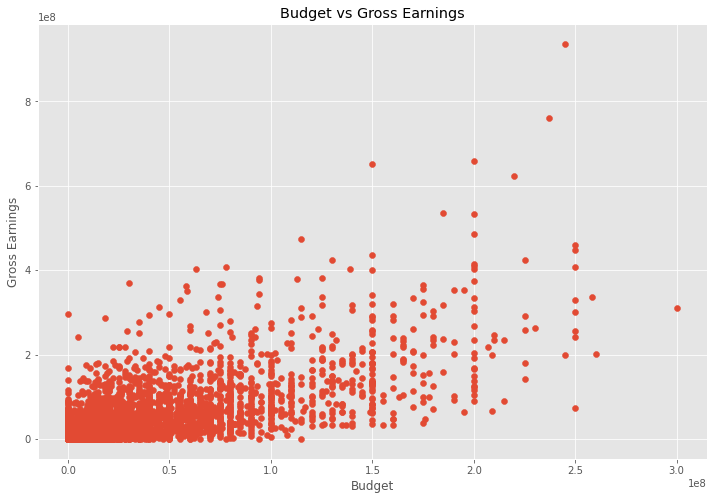

In [9]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

## It looks like the two columns have some positive relationship. It is appropriate to use regression analysis. Create a regression line

<AxesSubplot:xlabel='budget', ylabel='gross'>

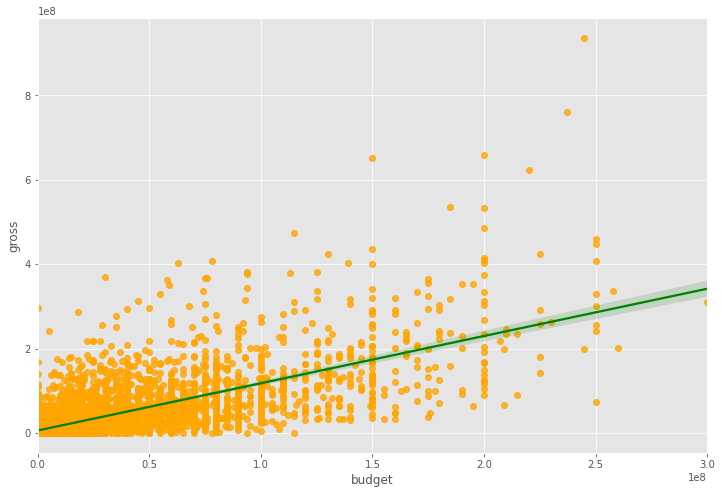

In [10]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

## The regression line shows budget and gross earnings have positive relationship intuitively. Next to see how much correlation it is.

In [11]:
df.corr()

,budget,gross,runtime,score,votes,year_released
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.220797
year_released,0.274820,0.176879,0.088342,0.117679,0.220797,1.000000


Text(0.5, 1.0, 'Correlation Matric for Numeric Features')

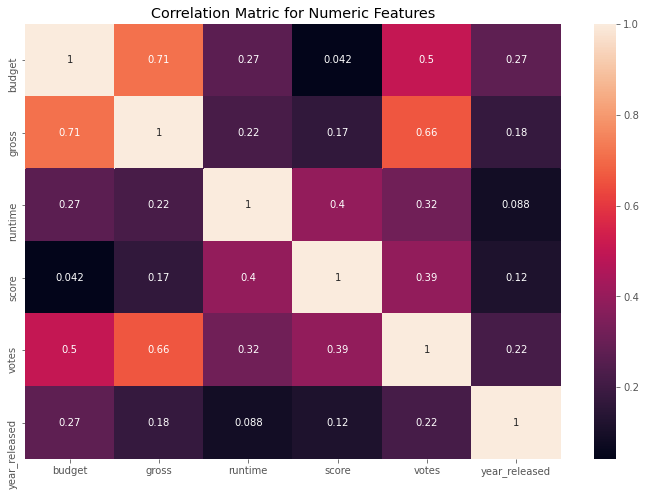

In [12]:
sns.heatmap(df.corr(),annot=True)  #Hypothesis is true
plt.title('Correlation Matric for Numeric Features')

### It shows that the correlation between budget and gross earnings is 0.71. It means the hypothesis is TRUE. More budget more gross earnings. Next to see if there could be new findings from other features.

## Check the correlation to all features

### Transfer non-numeric type columns to numeric type

In [13]:
df_num=df.copy()
for col in df_num.columns:
    if df_num[col].dtype!='int64' and df_num[col].dtype!='float64':
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes
df_num.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_released
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986


Text(0.5, 1.0, 'Correlation Matric for Numeric Features')

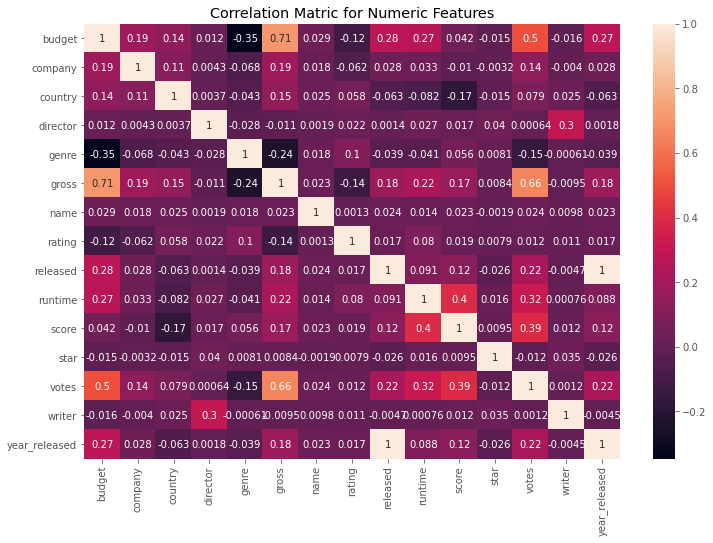

In [14]:
sns.heatmap(df_num.corr(),annot=True)
plt.title('Correlation Matric for Numeric Features')

### The heatmap shows the most effective columns for gross earnings are budget and votes

# Finding: Votes also has a high correlation to gross earnings